In [33]:
from skimage import io
from scipy import ndimage
import sys
import os
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import ndimage
import sys

In [34]:
os.chdir("C://Users//Ruben//Documents//GitHub//dhl-ads")

In [37]:
im = io.imread('test-image.jpg', plugin='freeimage')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\freeimage_plugin.py:6: skimage_deprecation: Function ``imread`` is deprecated. Use ``imageio plugin`` instead.
  def imread(filename):


In [39]:
from skimage.color import rgb2gray
from skimage import exposure

im = exposure.rescale_intensity(im)
im = rgb2gray(im)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
C:\ProgramData\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True


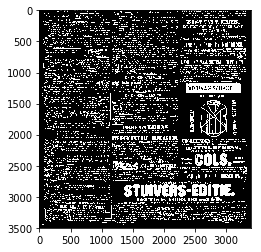

In [40]:
from skimage import filters, segmentation

# find a dividing line between 0 and 255
# pixels below this value will be black
# pixels above this value will be white
val = filters.threshold_otsu(im)

# the mask object converts each pixel in the image to True or False
# to indicate whether the given pixel is black/white
mask = im < val

# apply the mask to the image object
clean_border = segmentation.clear_border(mask)

# plot the resulting binarized image
plt.imshow(clean_border, cmap='gray')
plt.show()

In [41]:
from skimage.measure import label

# labeled contains one integer for each pixel in the image,
# where that image indicates the segment to which the pixel belongs
labeled = label(clean_border)

In [46]:
from skimage.measure import regionprops

# create array in which to store cropped articles
cropped_images = []

# define amount of padding to add to cropped image
pad = 20

# for each segment number, find the area of the given segment.
# If that area is sufficiently large, crop out the identified segment.
for region_index, region in enumerate(regionprops(labeled)):
    if region.area < 2000:
        continue

  # draw a rectangle around the segmented articles
  # bbox describes: min_row, min_col, max_row, max_col
    minr, minc, maxr, maxc = region.bbox

  # use those bounding box coordinates to crop the image
    cropped_images.append(im[minr-pad:maxr+pad, minc-pad:maxc+pad])

In [ ]:
import io

# create a directory in which to store cropped images
out_dir = "segmented_articles/"
if not os.path.exists(out_dir):
  os.makedirs(out_dir)

# save each cropped image by its index number
for c, cropped_image in enumerate(cropped_images):
    viewer = ImageViewer(cropped_image)
    viewer.show()

In [51]:
from skimage.viewer import ImageViewer


C:\ProgramData\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


[]